In [1]:
import matplotlib.pyplot as plt
import wfdb
import pandas as pd
import numpy as np
from scipy import signal
from skimage.restoration import denoise_wavelet

In [2]:
samp = 60000   #take a subset of data
rec = wfdb.rdrecord('G:/physionet.org/files/mimic4wdb/0.1.0/waves/p109/p10952189/82439920/82439920',    #picked a random patient
                    sampfrom=0, sampto=samp,
                    smooth_frames=False)

df = pd.DataFrame()
for (name, units, data) in zip(rec.sig_name,
                               rec.units,
                               rec.e_p_signal):
    # put the different ecg leads into a dataframe
    if len(data) == 4*samp:
        df[str(name)+'('+str(units)+')'] = data
    else:
        if name == 'Pleth':   #PPG
            pleth = data
        if name == 'ABP':   #Average Blood Pressure
            abp = data

    print('{} (units {}):'.format(name, units))
    print(len(data))


II (units mV):
240000
V (units mV):
240000
aVR (units mV):
240000
ABP (units mmHg):
120000
CVP (units mmHg):
120000
PAP (units mmHg):
120000
Pleth (units NU):
120000
Resp (units Ohm):
60000


**Visualzie the raw data**

Text(0.5, 1.0, 'ECG')

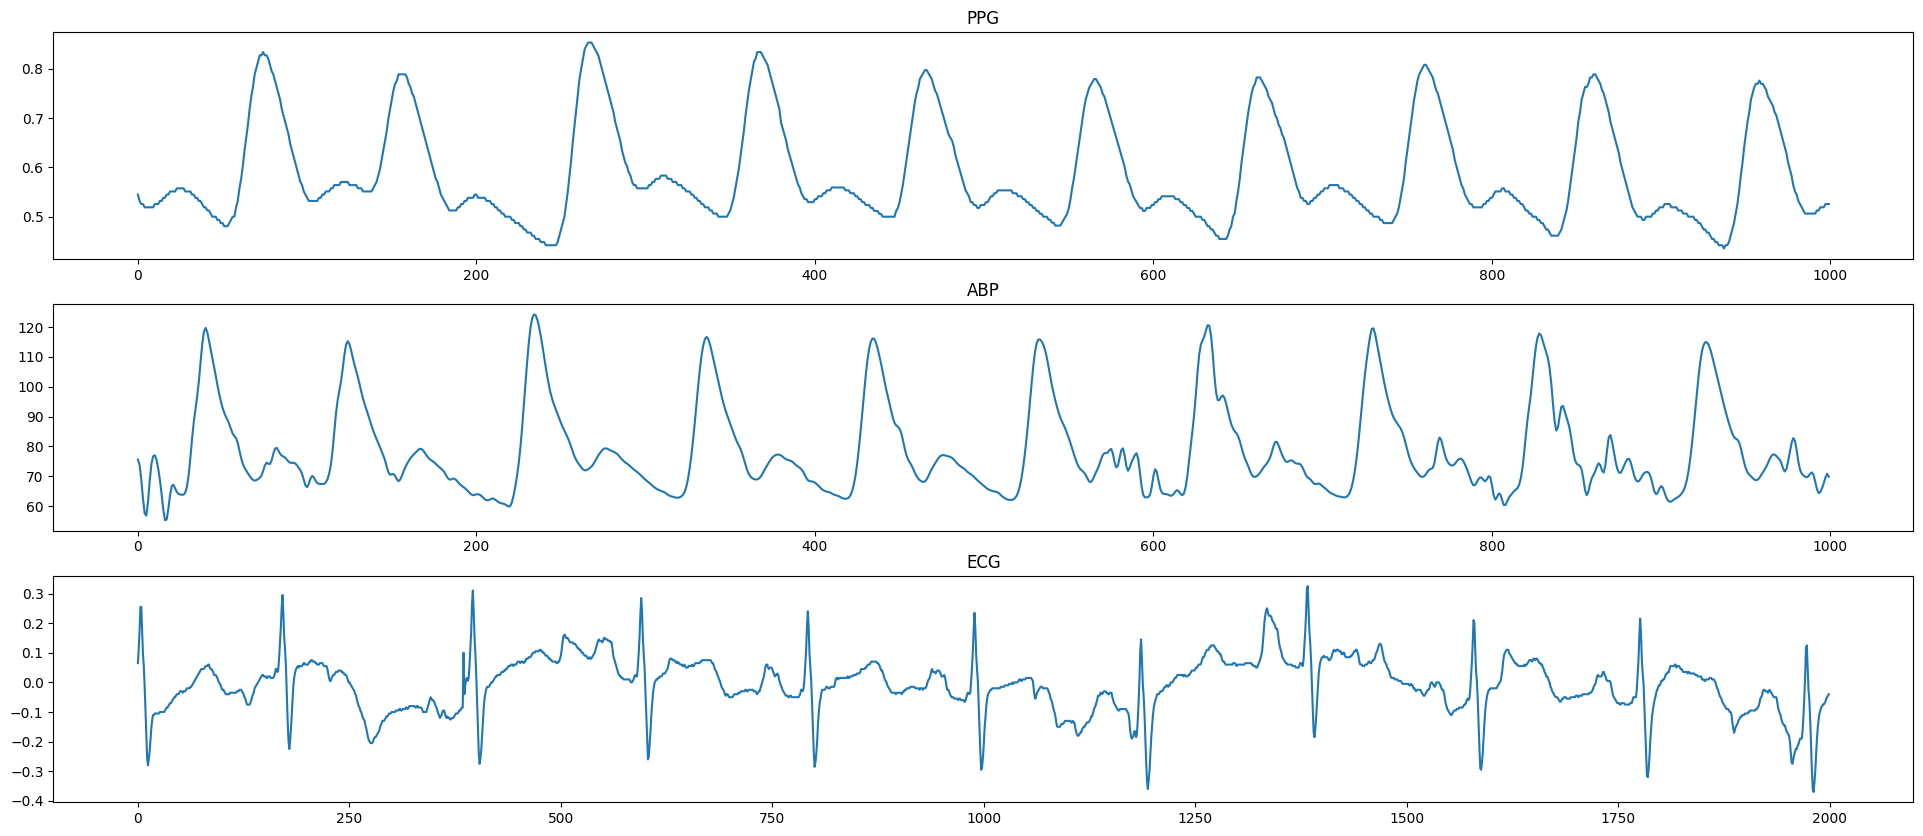

In [3]:
ecg = df['II(mV)'].values

plt.rcParams['figure.figsize'] = [24, 10]

plt.subplot(3,1,1)
plt.title('PPG')
plt.plot(pleth[4000:5000])

plt.subplot(3,1,2)
plt.plot(abp[4000:5000])
plt.title('ABP')

plt.subplot(3,1,3)
plt.plot(ecg[8000:10000])
plt.title('ECG')

In [18]:
sigma = 0.05  # Noise variance
noisy_ecg = ecg + sigma * np.random.randn(ecg.size)    #add noise to the ecg
noisy_ecg = noisy_ecg[3000:]
noisy_ppg = pleth + sigma * np.random.randn(pleth.size)    #add noise to the ppg
noisy_ppg = noisy_ppg[3000:]

denoised_ecg = denoise_wavelet(noisy_ecg, method='BayesShrink', mode='soft', wavelet_levels=2, rescale_sigma=True)
denoised_ppg = denoise_wavelet(pleth, method='VisuShrink', mode='soft', wavelet_levels=1, rescale_sigma=True)

Text(0.5, 1.0, 'Denoised PPG')

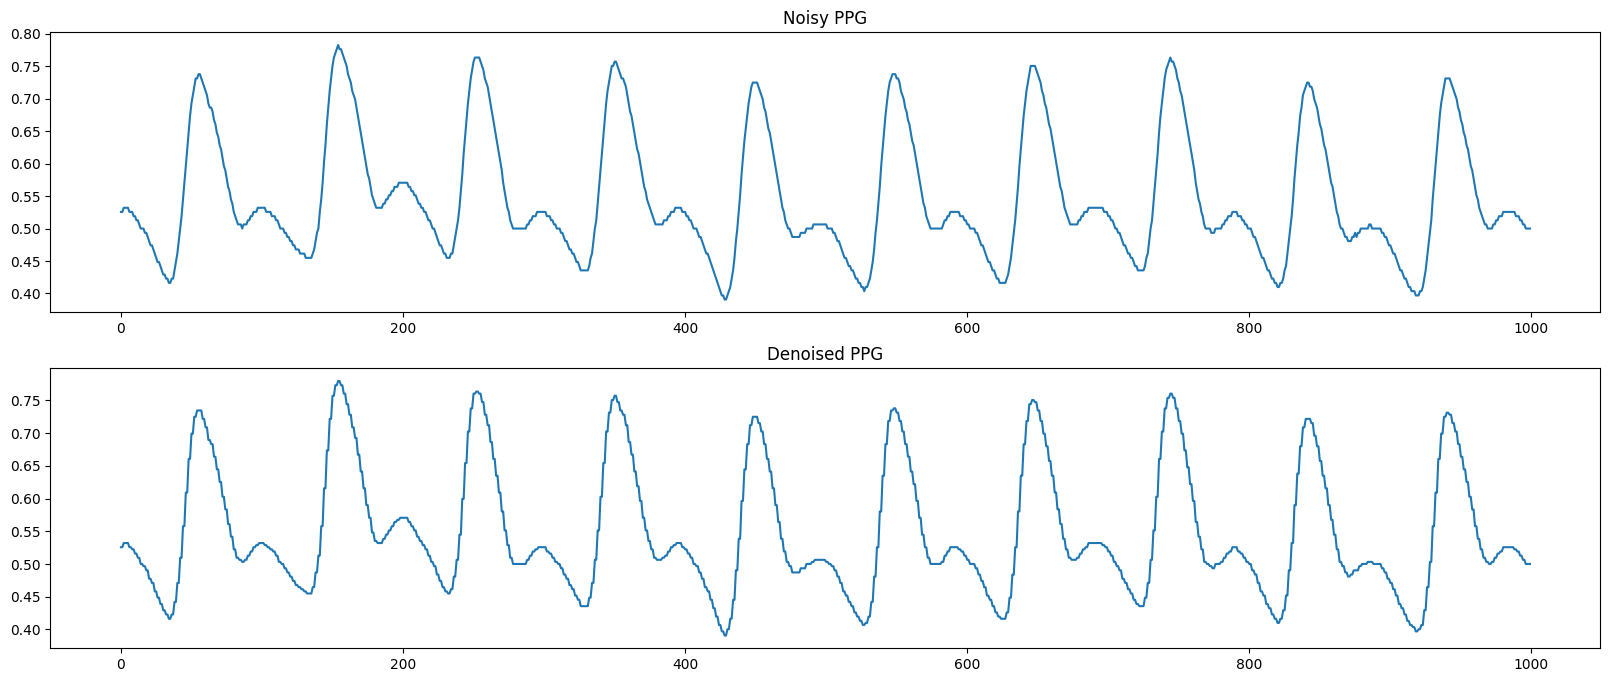

In [19]:
plt.rcParams['figure.figsize'] = [20, 8]

plt.subplot(2,1,1)
plt.plot(pleth[5000:6000])
plt.title('Noisy PPG')

plt.subplot(2,1,2)
plt.plot(denoised_ppg[5000:6000])
plt.title('Denoised PPG')